# Student Performance Factors

This project analyzes the factors that influence student academic performance and builds predictive models to estimate future academic outcomes based on current student characteristics.


**OVERVIEW**

In this application, you will explore a dataset from Kaggle [here](https://raw.githubusercontent.com/ninadpatilr-jpg/capstone-student-grade/refs/heads/main/data/StudentPerformanceFactors.csv). This dataset contains information on 6k+ students. Goal is not only to predict grades but to translate findings into actionable recommendations for schools, educators, and policymakers.


### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 25%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked to identify what influences student's performance. There are multiple interconnected factors --- academic habits, socio-demographic background, and access to resources. However, decisions about interventions are often made based on assumptions rather than evidence.

In [168]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error, r2_score
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from warnings import filterwarnings
filterwarnings('ignore')

### In this project, Using the CRISP-DM framework we will analyze a dataset to determine the key factors that drive Student's Performance. 
- **First clean and process the data to ensure accuracy and reliability**
- **Then, we will apply exploratory data analysis (EDA) and statistical modeling techniques to uncover trends in vehicle pricing.**
- **Identify the most influential factors affecting student grades**
- **Distinguish strong predictors from weak or commonly assumed factors**
- **Provide early indicators of academic risk**
- **Deliver data-driven recommendations for performance improvement**

Student academic performance is often discussed, but the drivers behind it are not always clearly understood. This capstone project will provide an actionable insights backed by data

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.
Will follow below steps:

- Identifying the variables (features) included in the dataset.
- Understanding the data types of each variable.
- Checking for missing values or inconsistencies.
- Exploring summary statistics to identify patterns or potential outliers.

In [169]:
#Lets begin with loading this dataset. I have already downloaded the dataset and placed it in the data folder. 
# You can download the dataset from here: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
df_student = pd.read_csv("data/StudentPerformanceFactors.csv")
print("Shape:", df_student.shape)
df_student.head()

Shape: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [170]:
df_student.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [171]:
# Display basic information about the dataset
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [172]:
# Now that we know the metadata of the student dataset let's check and drop duplicates if necessary and missing data
# Drop duplicates
df_student = df_student.drop_duplicates()
# Check for missing values in each column as a percentage
print("Missing Values Percentage \n_________________________________________")
print((df_student.isnull().sum() / len(df_student)) * 100) 

Missing Values Percentage 
_________________________________________
Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64


In [173]:
# Get the unique values for categorical columns
categorical_columns = df_student.select_dtypes(include=['object']).columns
print("Count of Unique values\n__________________________________")
for col in categorical_columns:
    print(f"{col}: ",df_student[col].nunique())

Count of Unique values
__________________________________
Parental_Involvement:  3
Access_to_Resources:  3
Extracurricular_Activities:  2
Motivation_Level:  3
Internet_Access:  2
Family_Income:  3
Teacher_Quality:  3
School_Type:  2
Peer_Influence:  3
Learning_Disabilities:  2
Parental_Education_Level:  3
Distance_from_Home:  3
Gender:  2


In [174]:
columns = ["Hours_Studied", "Attendance", "Tutoring_Sessions"]

fig = make_subplots(rows=3, cols=1, subplot_titles=[c.replace("_", " ").title() for c in columns])

for i, feat in enumerate(columns):
    vc = df_student[feat].value_counts().reset_index()
    vc.columns = [feat, "Count"]
    trace = px.bar(vc, x=feat, y="Count", color=feat, text="Count").data[0]
    fig.add_trace(trace, row=i + 1, col=1)

fig.update_traces(textposition="outside")
fig.update_layout(height=1200, width=1500,title="Student Feature Distributions", title_x=0.5, showlegend=False)

fig.show()

In [175]:
columns = [
    "Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Family_Income",
    "Teacher_Quality", "Peer_Influence", "Parental_Education_Level", "School_Type",
    "Internet_Access", "Learning_Disabilities", "Extracurricular_Activities", "Hours_Studied", "Attendance", "Tutoring_Sessions"
]
rng = np.random.default_rng()

fig = make_subplots(
    rows=7, cols=2,
    specs=[[{"type": "domain"}]*2]*7,
    subplot_titles=[c.replace("_", " ").title() for c in columns],
    vertical_spacing=0.02,
    horizontal_spacing=0.04
)

for i, feat in enumerate(columns):
    vc = df_student.groupby([feat, "Exam_Score"]).size().reset_index(name="Count")
    colors = [f'#{c:06x}' for c in rng.integers(0, 0xFFFFFF + 1, size=len(vc))]
    fig.add_trace(
        px.sunburst(vc, path=[feat, "Exam_Score"], values="Count",
                    color_discrete_sequence=colors).data[0],
        row=i//2 + 1, col=i%2 + 1
    )

fig.update_layout(
    height=3200,   # more canvas height → bigger circles per row
    width=1600,    # more canvas width
    margin=dict(t=60, l=10, r=10, b=10),
    title="<b><u>Student Factors</u></b>",
    title_x=0.5
)
fig.update_traces(textinfo="label+percent entry",
                  insidetextorientation="radial",
                  marker_line=dict(color="black", width=1))
fig.show()

In [176]:
#Finding unique values for object columns, uncomment the code below to see the unique values for each categorical column. 
# This can help us understand the data better and also identify any potential issues with the data (e.g., typos, inconsistent formatting, etc.)

# obj_cols = df_student.select_dtypes(include=["object", "string"]).columns
# for col in obj_cols:
#     uniques = df_student[col].dropna().unique()
#     print(f"{col} ({len(uniques)} unique): {uniques}")

In [177]:
# create a copy of dataframe called n_df_student which will only have numerical columns
n_df_student = df_student.copy(deep=True)

# Mapping dictionaries for categorical variables
Parental_Involvement = {"Low": 1, "Medium": 2, "High": 3}
Access_to_Resources = {"Low": 1, "Medium": 2, "High": 3}
Extracurricular_Activities = {"No": 0, "Yes": 1}
Motivation_Level = {"Low": 1, "Medium": 2, "High": 3}
Internet_Access = {"No": 0, "Yes": 1}
Family_Income = {"Low": 1, "Medium": 2, "High": 3}
Teacher_Quality = {"Low": 1, "Medium": 2, "High": 3}
School_Type = {"Public": 1, "Private": 2}
Peer_Influence = {"Negative": -1, "Neutral": 0, "Positive": 1}
Learning_Disabilities = {"No": 0, "Yes": 1}
Parental_Education_Level = {"High School": 1,"College": 2, "Postgraduate": 3}
Distance_from_Home = {"Near": 1,"Moderate": 2,"Far": 3 }
Gender = {"Male" : 1,"Female" : 2}

# Function to encode categorical columns into numerical using mapping dictionaries
def encode_job(series, column_number):
    return series.map(column_number).fillna(0).astype(int)

# convert object / text columns to numerical:
n_df_student["Parental_Involvement"] = encode_job(n_df_student["Parental_Involvement"], Parental_Involvement)
n_df_student["Access_to_Resources"] = encode_job(n_df_student["Access_to_Resources"], Access_to_Resources)
n_df_student["Extracurricular_Activities"] = encode_job(n_df_student["Extracurricular_Activities"], Extracurricular_Activities)
n_df_student["Motivation_Level"] = encode_job(n_df_student["Motivation_Level"], Motivation_Level)
n_df_student["Internet_Access"] = encode_job(n_df_student["Internet_Access"], Internet_Access)
n_df_student["Family_Income"] = encode_job(n_df_student["Family_Income"], Family_Income)
n_df_student["Teacher_Quality"] = encode_job(n_df_student["Teacher_Quality"], Teacher_Quality)
n_df_student["School_Type"] = encode_job(n_df_student["School_Type"], School_Type)
n_df_student["Peer_Influence"] = encode_job(n_df_student["Peer_Influence"], Peer_Influence)
n_df_student["Learning_Disabilities"] = encode_job(n_df_student["Learning_Disabilities"], Learning_Disabilities)
n_df_student["Parental_Education_Level"] = encode_job(n_df_student["Parental_Education_Level"], Parental_Education_Level)
n_df_student["Distance_from_Home"] = encode_job(n_df_student["Distance_from_Home"], Distance_from_Home)
n_df_student["Gender"] = encode_job(n_df_student["Gender"], Gender)

In [178]:
# features = ["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", "Motivation_Level", "Internet_Access", 
#             "Family_Income", "Teacher_Quality", "School_Type", "Peer_Influence", "Learning_Disabilities", "Parental_Education_Level", 
#             "Distance_from_Home", "Gender"]
n_df_student.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,1,3,0,1,1,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,-1,4,0,2,2,2,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,0,4,0,3,1,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,-1,4,0,1,2,1,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,0,4,0,2,1,2,70


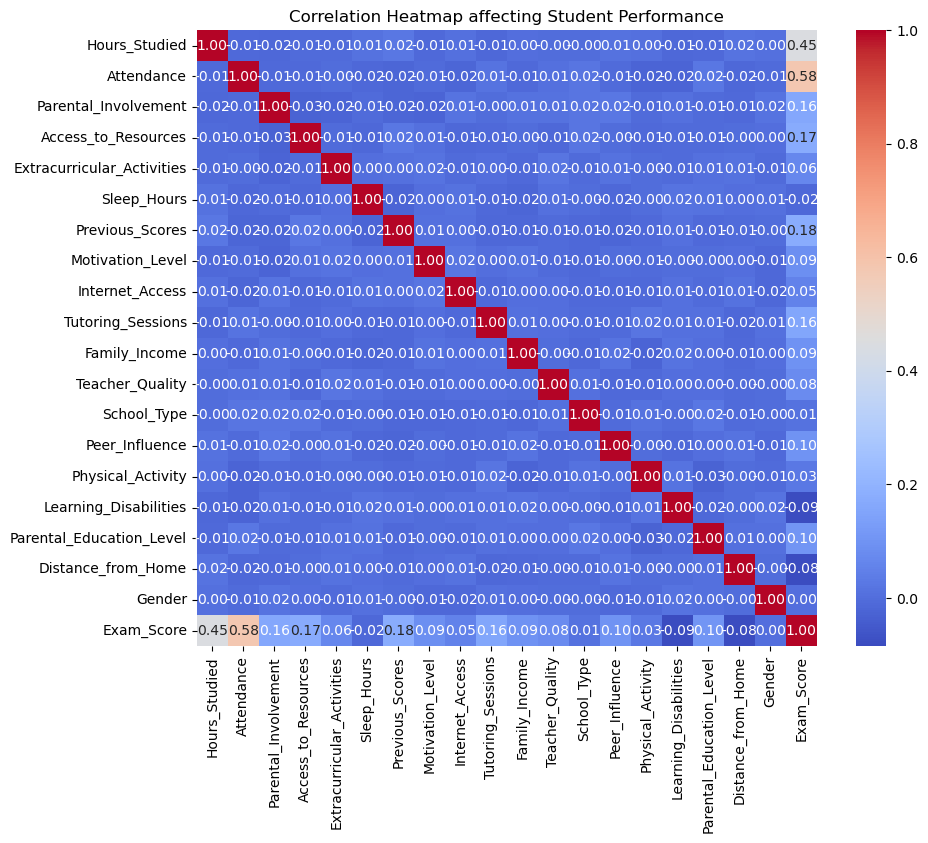

In [179]:
# Correlation heatmap  
corr_student = n_df_student.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_student, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap affecting Student Performance")
plt.show()

**Heatmap read-out (Exam_Score correlations)**  
- Strongest positives: Attendance (~0.58) and Hours_Studied (~0.45) — biggest linear drivers.  
- Medium positives: Previous_Scores (~0.18), Access_to_Resources (~0.16), Parental_Involvement (~0.17), Tutoring_Sessions (~0.11), Parental_Education_Level (~0.10), Motivation_Level (~0.09), Family_Income/Peer_Influence/Teacher_Quality (≈0.08–0.09).  
- Weak/neutral: Sleep_Hours (~0.06), Internet_Access (~0.05), Physical_Activity (~0.03), School_Type (~0.03), Gender (~0).  
- Negative: Distance_from_Home (~‑0.08) and Learning_Disabilities (~‑0.09) correlate with lower scores.

**Feature-to-feature correlations**  
- Nearly all off-diagonal values sit near 0–0.03 → low multicollinearity; models won’t be hurt by highly redundant predictors.  
- A few small pairings (e.g., Access_to_Resources with Family_Income, Parental_Involvement) are present but still mild.

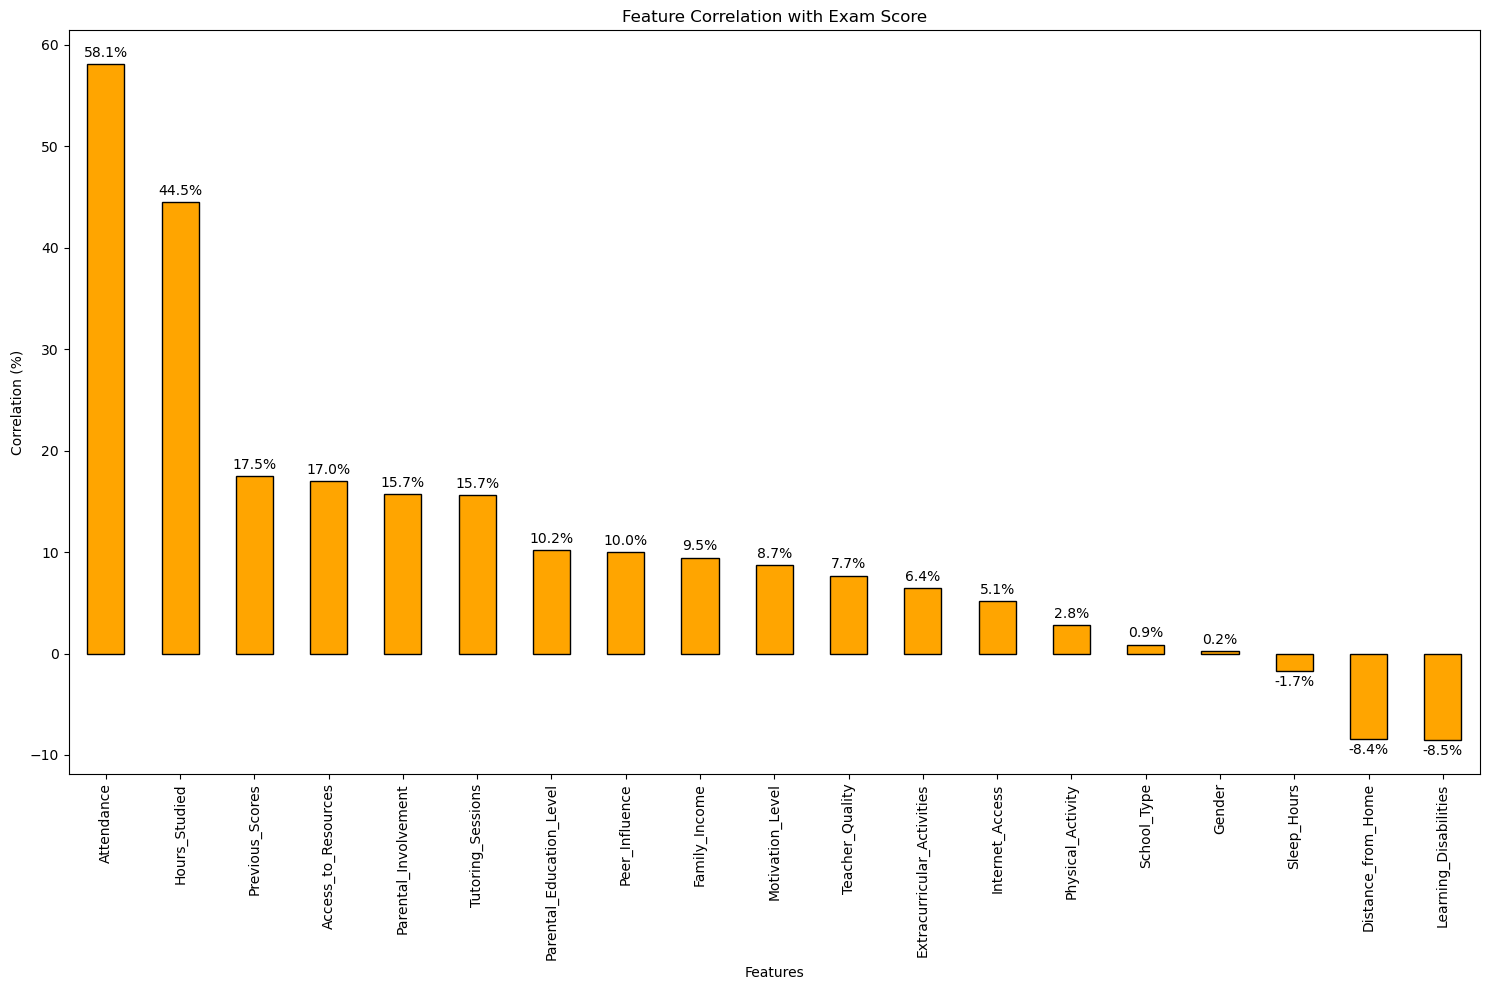

In [180]:
#Key features correlated with exam score

corr_student_target = corr_student["Exam_Score"].sort_values(ascending=False)
s = corr_student_target.drop("Exam_Score") * 100  # convert to %
ax = s.plot(kind="bar", color="orange", edgecolor="black",
            figsize=(15,10), title="Feature Correlation with Exam Score", ylabel="Correlation (%)", xlabel="Features")

ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3)
plt.tight_layout()
plt.show()

**EDA Conclusion**

- `Attendance (≈58%) and Hours_Studied (≈45%) dominate`: improving presence and study time should yield the largest score gains.  
- Prior achievement (`Previous_Scores ≈18%`) and access/enablers (Resources, `Parental_Involvement, Tutoring_Sessions ≈16–17%`) show `strong secondary influence`—target support here for students lagging.  
- `Mid‑tier factors` (Parental_Education_Level, Peer_Influence, Family_Income, Motivation_Level, Teacher_Quality) have modest correlations (~6–10%); they matter but with smaller leverage per unit effort.  
- Extracurricular_Activities, Internet_Access, Physical_Activity, School_Type, Gender cluster near zero, suggesting little direct linear effect on exam scores in this dataset.  
- `Actionable focus`: boost attendance and structured study time first; pair with tutoring/resources for at‑risk students, and provide targeted support for learners with disabilities or long commutes. These are the factors which are in teacher's control.

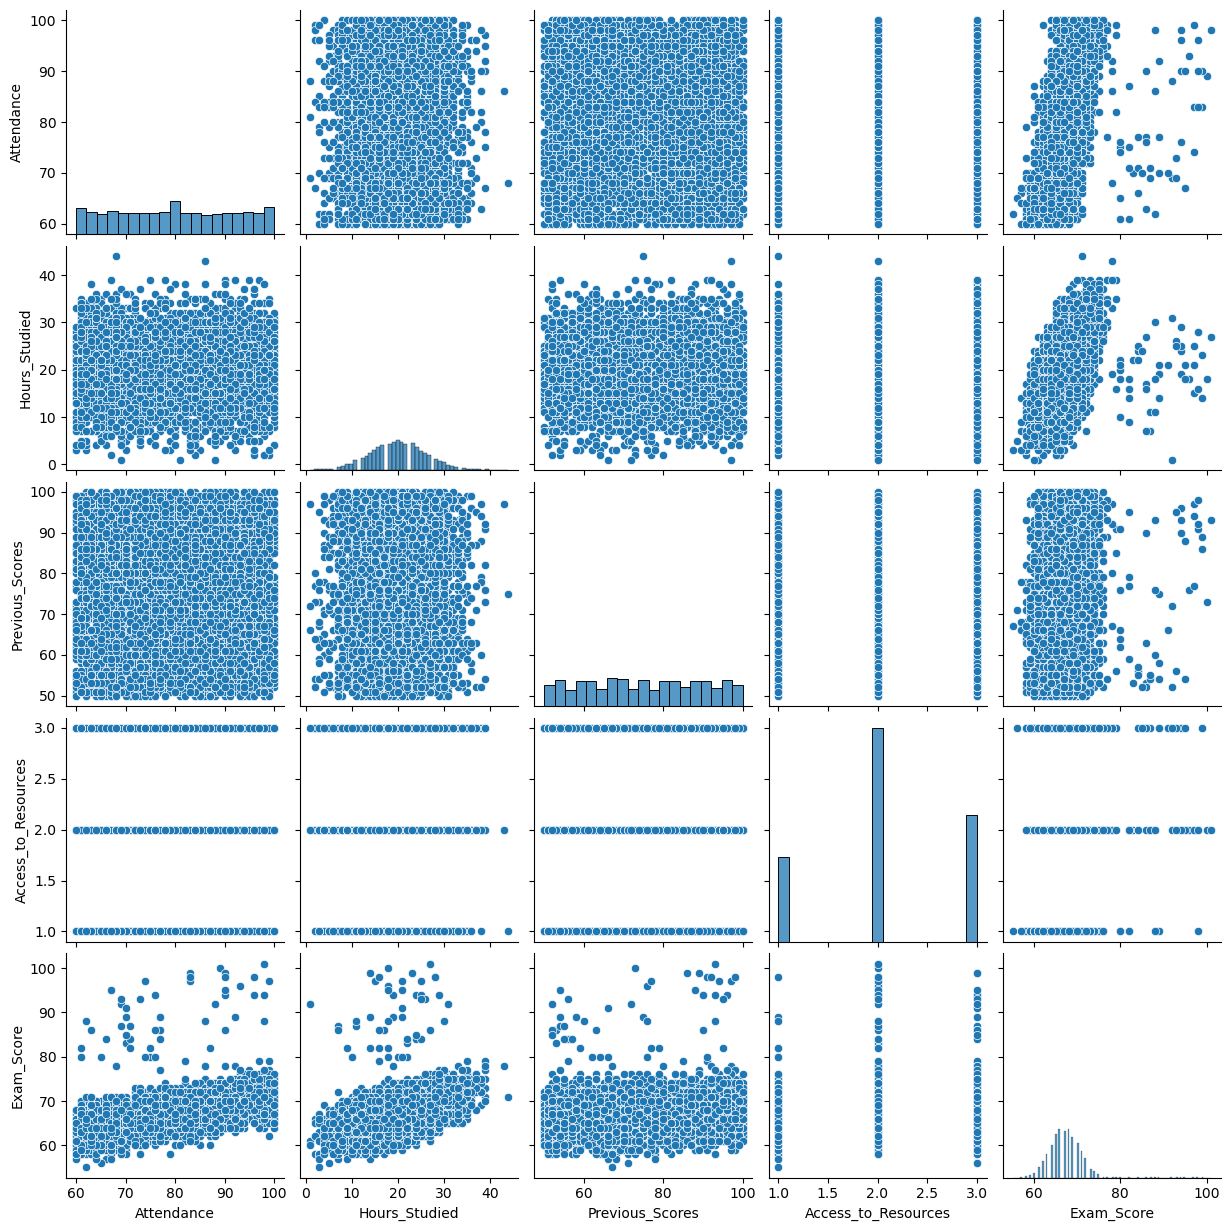

In [181]:
sns.pairplot(n_df_student[[
    "Attendance",
    "Hours_Studied",
    "Previous_Scores",
    "Access_to_Resources",
    "Exam_Score"
]])

### Train/Test Split:

With your data prepared, split it into a train and test set.

In [182]:
# Train-test split
X = n_df_student.drop(columns=["Exam_Score"])
y = n_df_student["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (5285, 19) Test: (1322, 19)


### A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [183]:
baseline_accuracy = y.value_counts(normalize=True).max()
print("Baseline accuracy:", baseline_accuracy)

Baseline accuracy: 0.11487815952777357


### Start with a Base Model(s)

Build a basic model on your data using:
 - Linear Regression
 - Logistic Regression
 - Ridge
 - Lasso
 - KNN
 - RandomForest
 - GradientBoosting

In [184]:
# numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, X.columns)
    ],
    remainder="drop"
)

In [185]:
# Linear Regression
pipe = Pipeline(steps=[("preprocess", preprocess), ("model", LinearRegression())])
pipe.fit(X_train, y_train)

preds = pipe.predict(X_test)

print("MSE:", mean_squared_error(y_test, preds))
print("R²:", r2_score(y_test, preds))

MSE: 3.275385148337913
R²: 0.7682795645666874


In [186]:
models = {
    "LinearRegression": LinearRegression(),
    "LogisticRegression": LogisticRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNN": KNeighborsRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor()
}

cv_results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocess), ("model", model)])

    t0 = time.perf_counter()
    pipe.fit(X_train, y_train)
    train_time = time.perf_counter() - t0

    # predictions for extra metrics (optional)
    preds = pipe.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    # accuracy or R² depending on model type
    train_score = pipe.score(X_train, y_train)
    test_score  = pipe.score(X_test, y_test)

    cv_results.append((name, train_time, train_score, test_score, mse, r2))

results_df = pd.DataFrame(cv_results, columns=["Model", "Train_Time_s", "Train_Accuracy", "Test_Accuracy", "Test_MSE", "Test_R2"]).sort_values("Test_MSE")
results_df

,Model,Train_Time_s,Train_Accuracy,Test_Accuracy,Test_MSE,Test_R2
2,Ridge,0.017355,0.715675,0.768282,3.275349,0.768282
0,LinearRegression,0.020011,0.715675,0.768280,3.275385,0.768280
6,GradientBoosting,0.387033,0.743125,0.736137,3.729723,0.736137
1,LogisticRegression,0.372137,0.641816,0.589259,3.872163,0.726060
5,RandomForest,1.290559,0.945113,0.664338,4.744609,0.664338
4,KNN,0.014466,0.651684,0.515958,6.841967,0.515958
3,Lasso,0.015597,0.398994,0.437833,7.946270,0.437833


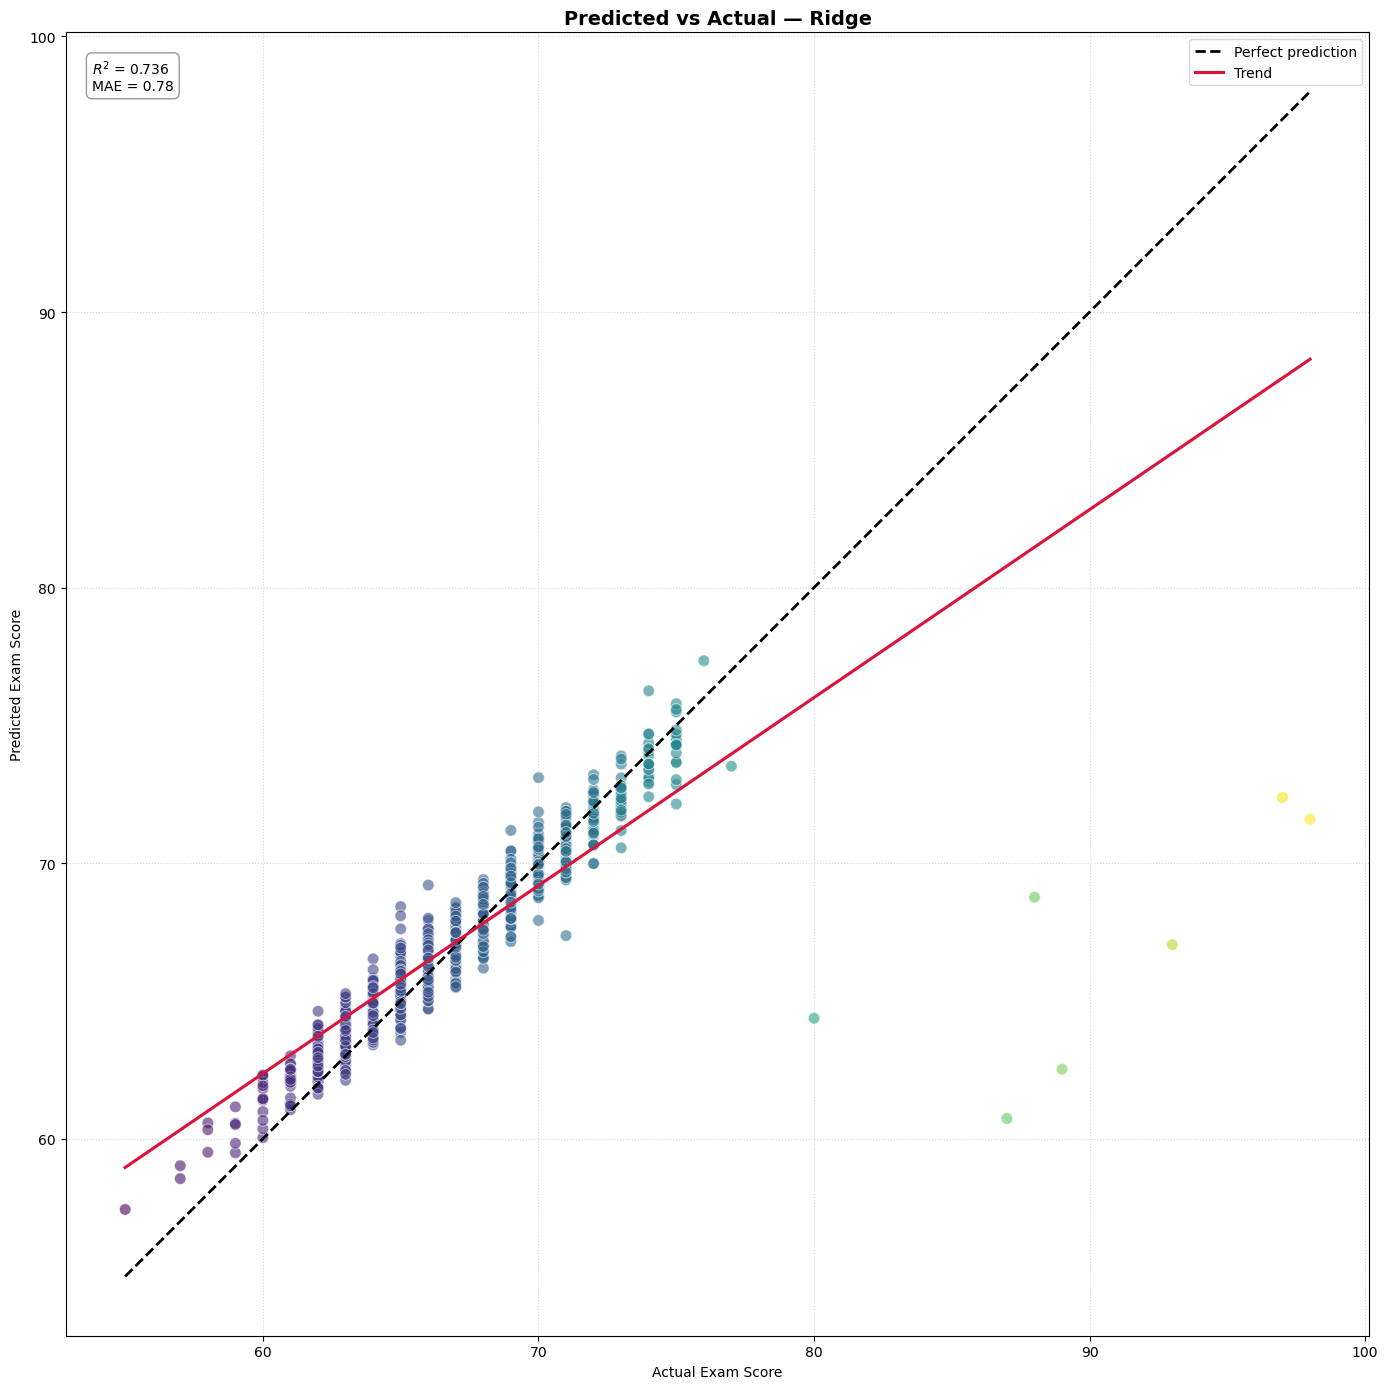

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error

model_name = results_df.iloc[0]["Model"]
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)

plt.figure(figsize=(14,14))
ax = sns.scatterplot(x=y_test, y=preds, hue=y_test, palette="viridis",
                     edgecolor="white", alpha=0.6, s=70, legend=False)

# identity line
lims = [min(y_test.min(), preds.min()), max(y_test.max(), preds.max())]
ax.plot(lims, lims, color="black", lw=2, ls="--", label="Perfect prediction")

# lowess/regression trend
sns.regplot(x=y_test, y=preds, scatter=False, ax=ax, color="crimson", ci=None, label="Trend")

ax.set_title(f"Predicted vs Actual — {model_name}", fontsize=14, weight="bold")
ax.set_xlabel("Actual Exam Score")
ax.set_ylabel("Predicted Exam Score")
ax.set_aspect("equal", adjustable="box")
ax.grid(True, ls=":", alpha=0.5)
ax.legend(loc="upper right")

# metrics box
text = f"$R^2$ = {r2:.3f}\nMAE = {mae:.2f}"
ax.text(0.02, 0.98, text, transform=ax.transAxes,
        va="top", ha="left", bbox=dict(boxstyle="round,pad=0.4", facecolor="white", alpha=0.8, edgecolor="gray"))

plt.tight_layout()
plt.show()

### Evaluation
- Overall fit is decent (R² ≈ 0.736) with low average error (MAE ≈ 0.78), but performance isn’t uniform across the score range.  
- Regression line is flatter than the 45° line: the model overpredicts low scores (actual < ~62) and underpredicts high scores (actual > ~70), showing classic shrinkage toward the mean from regularization.  
- High-actual/low-predicted outliers (right-lower area) reveal the biggest misses; the model struggles with the top scorers.  
- Spread of points widens with higher actual scores → heteroscedasticity; error variance grows in the upper range.  
- Most predictions cluster tightly in mid-range (≈60–75), indicating limited ability to capture extremes.